In [1]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.3MB 5.8MB/s 
  Found existing installation: tensorflow-datasets 2.1.0
    Uninstalling tensorflow-datasets-2.1.0:
      Successfully uninstalled tensorflow-datasets-2.1.0


In [0]:
!pip3 install future

In [0]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import tensorflow_datasets as tfds
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import math
import numpy as np
import matplotlib.pyplot as plt
 
import tqdm #progress bar display
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm
print(tf.__version__)
#tf.enable_eager_execution()

2.2.0-rc3


In [0]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised = True, with_info = True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteF35R92/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteF35R92/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [0]:
class_names = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [0]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("number of training examples: {}".format(num_train_examples))
print("number of test examples: {}".format(num_test_examples))

number of training examples: 60000
number of test examples: 10000


In [0]:
def normalize(images,labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

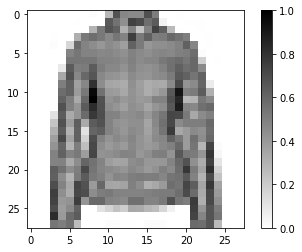

(28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.01176471 0.         0.2784314  0.6745098
  0.4745098  0.45882353 0.45882353 0.6862745  0.50980395 0.
  0.         0.00392157 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00392157 0.         0.         0.         0.6509804  0.54901963
  0.4392157  0.74509805 0.7058824  0.5686275  0.6431373  0.04705882
  0.         0.         0.00392157 0.00392157 0.00392157 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.29411766 0.52156866 0.67058825 0.61960787
  0.30980393 0.49019608 0.23137255 0.49019608 0.7372549  0.62352943
  0.27058825 0.00392157 0.         0.         0.00392157 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.3137255  0.52156866 0.56862

In [0]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()
print(image.shape)
print(image)

(28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.01176471 0.         0.2784314  0.6745098
  0.4745098  0.45882353 0.45882353 0.6862745  0.50980395 0.
  0.         0.00392157 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00392157 0.         0.         0.         0.6509804  0.54901963
  0.4392157  0.74509805 0.7058824  0.5686275  0.6431373  0.04705882
  0.         0.         0.00392157 0.00392157 0.00392157 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.29411766 0.52156866 0.67058825 0.61960787
  0.30980393 0.49019608 0.23137255 0.49019608 0.7372549  0.62352943
  0.27058825 0.00392157 0.         0.         0.00392157 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.3137255  0.52156866 0.56862

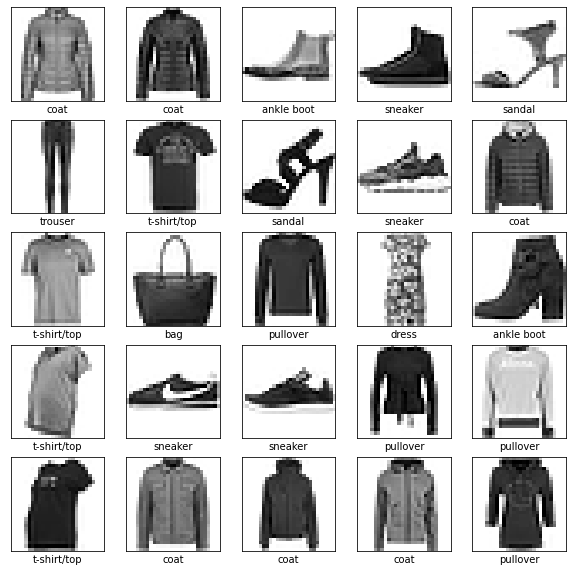

In [0]:
plt.figure(figsize = (10,10))
i = 0 
for image, label in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap = plt.cm.binary)
  plt.xlabel(class_names[label])
  i += 1
  print(image.shape)
  print(image)

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28,1)), tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax) 
                                                    ])

In [0]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset =  test_dataset.batch(BATCH_SIZE)

In [0]:
model.fit(train_dataset, epochs = 5 , steps_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4963 - accuracy: 0.8237
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3792 - accuracy: 0.8637
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3340 - accuracy: 0.8779
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3129 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2914 - accuracy: 0.8943


In [0]:
test_loss, test_accuracy = model.evaluate( test_dataset, steps = math.ceil(num_test_examples/32))
print('Accuracy on data set:', test_accuracy )

313/313 [==============================] - 1s 3ms/step - loss: 0.3612 - accuracy: 0.8721
Accuracy on data set: 0.8720999956130981


In [0]:
for test_images,test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [0]:
predictions.shape

(32, 10)

In [0]:
predictions[0]

array([3.2608037e-05, 9.0708672e-05, 2.0245450e-02, 7.2978202e-07,
       9.6983510e-01, 5.5804202e-11, 9.7930301e-03, 4.2147916e-10,
       2.4371418e-06, 3.0774086e-10], dtype=float32)

In [0]:
np.argmax(predictions[0])

4

In [0]:
test_labels[0]

4